In [17]:
from astropy.table import QTable, Table
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy.ma as ma

In [70]:
master_list = QTable.read("DRPall-master_file.txt", format="ascii.ecsv")
gbtHI = Table.read('mangaHIall.fits', format='fits')
alfaHI = Table.read('manga_dr15_alfalfa.fits', format='fits')
maps = fits.open('data/manga-10001-12701-MAPS-HYB10-GAU-MILESHC.fits', format = 'fits')
#map_filename = 'data/manga-' + galID[i] + '-MAPS-HYB10-GAU-MILESHC.fits'
#maps = fits.open(map_filename, format = 'fits')

In [71]:
master_list['galID'] = np.empty(len(master_list), dtype='<S12')

for i in range(len(master_list)):
    galID = str(master_list['MaNGA_plate'][i]) + str('-') +  str(master_list['MaNGA_IFU'][i])
    master_list['galID'][i] = galID

#### Work to do by Thursday 27th Aug
>1) Install marvin\
2) Look at cheatsheet and import maps\
3) work with the map values for one of the galaxies\
4) make a loop for all galaxies
5) find ratio to hI flux

In [72]:
master_list['FHI'] = np.NaN*np.ones(len(master_list), dtype = float)

for i in range(len(alfaHI)):
    galID = alfaHI['PLATEIFU'][i]
    plate, IFU = galID.split('-')
    
    # Find the corresponding row index for this galaxy in the MaNGA data table
    plate_boolean = master_list['MaNGA_plate'] == int(plate)
    IFU_boolean = master_list['MaNGA_IFU'] == int(IFU)
    HI_boolean = np.logical_and(plate_boolean, IFU_boolean)
   
    master_list['FHI'][HI_boolean] = alfaHI['FHI'][i]
  

In [73]:
for i in range(len(gbtHI)):
    galID = gbtHI['plateifu'][i]
    plate, IFU = galID.split('-')
    
    # Find the corresponding row index for this galaxy in the MaNGA data table
    plate_boolean = master_list['MaNGA_plate'] == int(plate)
    IFU_boolean = master_list['MaNGA_IFU'] == int(IFU)
    HI_boolean = np.logical_and(plate_boolean, IFU_boolean)
   
    master_list['FHI'][HI_boolean] = gbtHI['FHI'][i]
  

In [74]:
masterlistHI_boolean = np.isfinite(master_list['FHI'])

masterlistHI = master_list[masterlistHI_boolean]

In [75]:
masterlist_boolean = masterlistHI['FHI'] > 0
masterList = masterlistHI[masterlist_boolean]

In [76]:
#maps.info() #gives all the layers in the map fits file
Ha_map = maps['EMLINE_GFLUX'].data[18] # H-alpha is the 19th layer of the maps in 'EMLINE_GLFUX'
#maps['EMLINE_GFLUX'].header #header info inside EMLINE GFLUX

In [77]:
# H-alpha mask extension #QUALDATA gives the 'quality' of the data 
Ha_mask_extension = maps['EMLINE_GFLUX'].header['QUALDATA']
masked_Ha_map = ma.array(Ha_map, mask=maps[Ha_mask_extension].data[18] > 0)

1) See the data (plot)\ (plt.imshow)
2) Add up the flux values in the map arrays\
3) Write a loop for all the data 


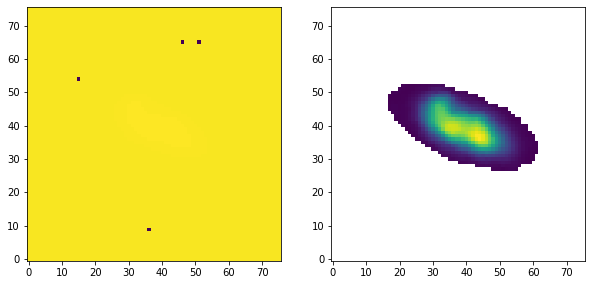

In [78]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))
axs[0].imshow(Ha_map, origin = 'lower')
axs[1].imshow(masked_Ha_map, origin = 'lower')
plt.show()

In [79]:
total_Ha_flux = np.sum(masked_Ha_map)

In [80]:
total_Ha_flux

1898.2083

In [81]:
masterList['Total_Ha_flux'] = np.empty(len(masterList), dtype = np.int)

In [91]:
master_list

MaNGA_plate,MaNGA_IFU,NSAID,ra,dec,redshift,ba,phi,Mstar,rabsmag,plate,MJD,fiberID,index,imc,aimc,smoothness_score,logHI,WF50,WP20,galID,FHI
,,,deg,deg,,,deg,solMass,,,,,,,,,dex(solMass),km / s,km / s,,
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,bytes12,float64
8939,12704,315868,125.687370639,24.2969703898,0.012853,0.844731,122.186,11279500000.0,-20.2376,1585,52962,25,1819519,2.0,-2.0,nan,10.050000190734863,450.30642298214684,534.3885351572364,8939-12704,14.739999771118164
9507,12704,647713,129.600036621,25.7545013428,0.0181814,0.850208,49.2228,15330500000.0,-20.4859,1930,53347,477,1855126,2.0,26.45,nan,9.470000267028809,157.66071995536652,180.45504091276888,9507-12704,1.909999966621399
8942,12703,231299,125.21338865,28.4058888443,0.0154449,0.461519,115.538,550312000.0,-17.0032,1207,52672,201,1035105,2.0,55.1,nan,9.199999809265137,204.02864720354242,278.4258334766573,8942-12703,1.4700000286102295
9512,12703,57296,140.009042427,1.03830336226,0.0170264,0.703029,17.2008,51986200000.0,-21.3582,473,51929,86,184190,1.0,1.0,nan,-999.0,-1404.7448410992704,-1404.7448410992704,9512-12703,-999.0
8153,12703,39428,41.0682926204,0.341599264633,0.0220552,0.692925,154.034,2972350000.0,-19.7777,409,51871,347,772008,1.0,1.0,nan,-999.0,-1385.5570062798865,-1385.5570062798865,8153-12703,-999.0
8940,12702,173375,120.087417603,26.613527298,0.0267379,0.734859,114.25,44110400000.0,-21.337,929,52581,142,878643,2.0,0.0,nan,10.140000343322754,594.2025475719039,549.9691073060053,8940-12702,4.21999979019165
8982,12702,484109,202.623387924,26.5145483668,0.0250234,0.391208,48.8718,238771000.0,-17.2953,2244,53795,637,2226374,2.0,115.14,nan,9.050000190734863,68.45576811268691,193.4147099056868,8982-12702,0.3799999952316284
9493,12702,407342,129.012733645,23.9118395792,0.0121797,0.435525,46.151,210392000.0,-16.4453,1929,53349,526,1876778,2.0,105.88,nan,9.069999694824219,156.63592510904022,213.2914724889058,9493-12702,1.690000057220459


In [99]:
for i in range(len(master_list)):
    if master_list['galID'][i] == '10001-12701':
        print(i)

644


In [100]:
# for i in range(len(masterList)):
#     map_filename = 'data/manga-' + masterList['galID'][i] + '-MAPS-HYB10-GAU-MILESHC.fits'
#     maps = fits.open(map_filename, format = 'fits')
#     Ha_mask_extension = maps['EMLINE_GFLUX'].header['QUALDATA']
#     masked_Ha_map = ma.array(Ha_map, mask=maps[Ha_mask_extension].data[18] > 0)
#     total_Ha_flux = np.sum(masked_Ha_map)
#     masterList['Total_Ha_flux'][i] = total_Ha_flux  